In [1]:
try:
    # install for jupyterlite if needed
    import piplite
    print('installing piplite packages... This may take up to ~5 minutes. If still running, please try refreshing the page.')
    await piplite.install(['mathpad', 'nbformat>=5.6', 'ipywidgets>=7,<8'])
    print('piplite packages installed and ready to go!')
    in_jupyterlite = True

except (ImportError, SyntaxError):
    # not running in jupyterlite
    in_jupyterlite = False

from mathpad import *


# Mathpad Features TLDR

In [2]:
print("Constants")
a = 10 * meter / s**2
a

Constants


10 meters/second**2

In [3]:
print("Variables")
b = "b(t)" * m / s
b

Variables


b(t) meters/second

In [4]:
print("Vector Spaces / Reference Frames")
O = R3("O")
O

Vector Spaces / Reference Frames


Matrix([
[meter],
[meter],
[meter]])

In [5]:
print("Vector Constants")
c = O[1, 2, 3]
c

Vector Constants


O[1, 2, 3]

In [6]:
print("Vector Variables")
d = O.sym("d")
d

Vector Variables


O["d"]

In [7]:
print("Calculus")
display(
    integral(b, between=(0, 1))
)

e = diff(b)
e

Calculus


Integral(b(t), (t, 0, 1)) meters

Derivative(b(t), t) meters/second**2

In [8]:
print("Equations")
eqn = a / e * c == d
eqn

Equations


O[10/Derivative(b(t), t), 20/Derivative(b(t), t), 30/Derivative(b(t), t)] = O[d[0, 0], d[1, 0], d[2, 0]] <O: OutputSpace>

In [9]:
print("Dimensional Validity Checking")

try:
    a + b
except DimensionError as e:
    print("DimensionError:", e)

Dimensional Validity Checking
DimensionError: [length/time**2: 10 meters/second**2] "+" [length/time: b(t) meters/second]


In [10]:
print("Equation Solving")
sln = solve(eqn, d)
sln[d]

Equation Solving


O[10/Derivative(b(t), t), 20/Derivative(b(t), t), 30/Derivative(b(t), t)]

In [11]:
print("Algebra\n=========\n")

print("Substituting b =")
b_subs = (5 * t) * (m / s**2)
display(b_subs)

print("Yields d =")
f = subs(sln[d], { b: b_subs })
display(f)

print("Which simplifies to")
simplify(f)

Algebra

Substituting b =


5*t meters/second

Yields d =


O[10/Derivative(5*t, t), 20/Derivative(5*t, t), 30/Derivative(5*t, t)]

Which simplifies to


O["Matrix([[2], [4], [6]])"]

In [12]:
print("Automatic Unit Conversion (favors the larger unit)")
dist = 10 * km + 3 * miles
dist

Automatic Unit Conversion (favors the larger unit)


9.21371 miles

In [13]:
print("Manual Unit Conversion")
display(dist.in_units(km))
dist.in_units("SI")

Manual Unit Conversion


14.828 kilometers

1.4828e+4 meters

Simulation of differential systems of equations

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=10 with a max_step of 0.01.


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation finished. Plotting...


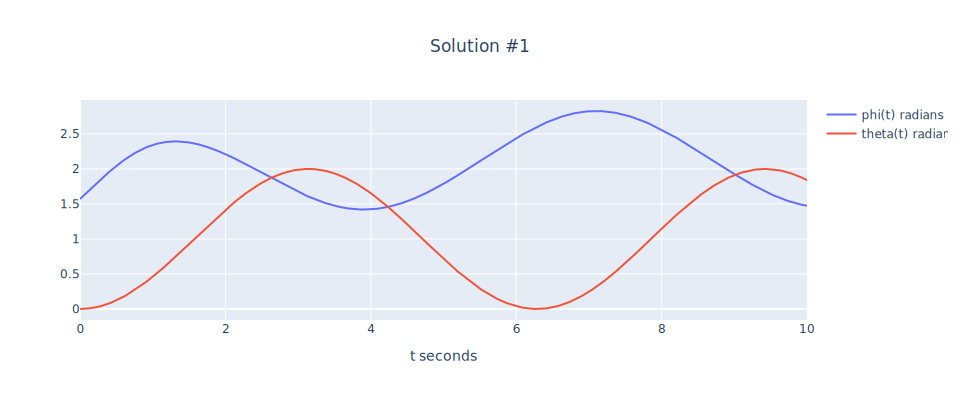

In [14]:
print("Simulation of differential systems of equations")
print("===============================================\n")

theta = "theta(t)" * rad
phi = "phi(t)" * rad

system_of_eqns = [
    diff(theta) == sin(t * rad / s) / s,
    diff(phi) == sin(theta + phi) / s
]

sim_data = simulate_dynamic_system(
    system_of_eqns,
    x_final=10, max_step=0.01,
    record=[phi, theta],
    initial_conditions={theta: 0, phi: pi / 2},
    display_explanation=False,
    plot_static=not in_jupyterlite
)